# <font size=35 color=lightgreen>** Sentiment API **<font>
---

### <font size=12 color=lightgreen>Configuración Inicial (Librerías)</font>

#### 1. Procesamiento y Manipulación de Datos
* **`pandas`**
    * Nos ayuda con la manipulación y análisis de datos estructurados.
    * Carga el dataset (CSV), gestiona el DataFrame y permite filtrar o limpiar registros.
* **`numpy`**
    * Realiza las operaciones matemáticas y manejo de arrays eficientes.
    * Soporte numérico fundamental para las transformaciones vectoriales de los textos.

#### 2. Visualización y Análisis Exploratorio

* **`matplotlib.pyplot`**
    * Generación de gráficos estáticos.
    * Visualización básica de la distribución de clases (Positivo vs. Negativo).
* **`seaborn`**
    * Visualización de datos estadísticos avanzada.
    * Generación de matrices de confusión y gráficos de distribución estéticos para la presentación.

#### 3. Procesamiento de Lenguaje Natural (NLP) y Limpieza

* **`re`** (Regular Expressions)
    * Manejo de expresiones regulares.
    * Eliminación de ruido en el texto: URLs, menciones (@usuario), hashtags (#) y caracteres especiales no alfanuméricos.
* **`string`**
    * Constantes de cadenas comunes.
    * Provee listas estándar de signos de puntuación para su eliminación eficiente.

#### 4. Modelado y Machine Learning (Core)

* **`scikit-learn`**
    * Biblioteca principal de Machine Learning.
    * **`TfidfVectorizer`**: Transforma el texto limpio en vectores numéricos.
    * **`LogisticRegression`**: Algoritmo de clasificación supervisada.
    * **`metrics`**: Cálculo de precisión, recall y F1-score.
    * **`Pipeline`**: Encapsulamiento de los pasos de transformación y predicción.

#### 5. Persistencia e Integración
Herramientas para conectar el modelo con el Backend.

* **`joblib`**
    * Serialización eficiente de objetos Python.
    * Exportar (`dump`) el pipeline entrenado a un archivo `.joblib` y cargarlo (`load`) en la API para realizar predicciones.
* **`fastapi` & `uvicorn`**
    * Framework web moderno de alto rendimiento.
    * Exponer el modelo entrenado como un microservicio REST (endpoint `/predict`) para ser consumido por el Backend en Java.




---



### <font size=16  color=lightgreen> Importando librerías <font>



In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import uvicorn
import sklearn
import fastapi
import joblib
import unicodedata
import warnings
warnings.filterwarnings('ignore')

### <font size = 8 color="lightgreen">Importación de los datasets<font>

#### **Función importación dataset**

In [324]:
# Función para importar datasets

def importar_dataset(url,encode):
    try:
        data = pd.read_csv(url, encoding= encode, sep = ';')
        print("✅ Archivo cargado correctamente")
        print(f"Tamaño del dataset: {data.shape}")
        print(data.sample(3))
    except Exception as e:
        print(f"❌ Error: {e}")
    return data

#### **Dataset1: sentimentdataset_es.csv**

In [325]:
data1 = importar_dataset("https://raw.githubusercontent.com/ml-punto-tech/sentiment-api/refs/heads/feature/data-science-marely/data-science/datasets/datasets-origin/sentimentdataset_es.csv",'utf-8')


✅ Archivo cargado correctamente
Tamaño del dataset: (732, 15)
     Unnamed: 0.1  Unnamed: 0  \
313           210         212   
650           235         239   
676           585         589   

                                                  Text       Sentiment  \
313  Entumecido ante el caos, las emociones encerra...  Entumecimiento   
650  Buscando la serenidad en la melodía de las got...       Serenidad   
676  Decidió estudiar para los exámenes, pero termi...        Sorpresa   

            Timestamp             User   Platform  \
313  28-12-2019 14:30        StoicSoul  Instagram   
650  12-04-2020 19:30  RaindropHarmony    Twitter   
676  24-05-2023 13:15      MemeCreator  Instagram   

                                     Hashtags  Retweets  Likes    Country  \
313           #Entumecimiento #FachadaEstoica         8     15  Australia   
650  #Serenidad #Melodía de la Gota de Lluvia        25     50     Canadá   
676         #EstudiandoMemes #VidaAdolescente        25     50  

#### **Dataset2: sentiment_analysis_dataset.csv**

In [326]:
data2 = importar_dataset("https://raw.githubusercontent.com/ml-punto-tech/sentiment-api/refs/heads/feature/data-science-marely/data-science/datasets/datasets-origin/sentiment_analysis_dataset.csv",'latin-1')

✅ Archivo cargado correctamente
Tamaño del dataset: (2540, 3)
                                                  texto  label sentimiento
596   todas putas mira la cara de pobrecito desilusi...      0    negativo
1317  Se sentaron y comieron en silencio. Pero fue ...      2    positivo
321   Y el dolor era como el fin del mundo.  Llega u...      0    negativo


### <font size= 12 color="lightgreen" >Explorando los datasets<font>

#### **Explorando Data1**

In [327]:
# Crear función para explorar datasets
def explorar_dataset(data):
    print('Filas: ' + str(data.shape[0]))
    print('Columnas: ' + str(data.shape[1]))
    print('\nColumnas: \n' + str(data.columns.tolist()))
    print('\nTipo de datos: \n' + str(data.dtypes))
    print('\nValores nulos: \n' + str(data.isnull().sum()))
    print(data.sample(5))

In [328]:
explorar_dataset(data1)

Filas: 732
Columnas: 15

Columnas: 
['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']

Tipo de datos: 
Unnamed: 0.1     int64
Unnamed: 0       int64
Text            object
Sentiment       object
Timestamp       object
User            object
Platform        object
Hashtags        object
Retweets         int64
Likes            int64
Country         object
Year             int64
Month            int64
Day              int64
Hour             int64
dtype: object

Valores nulos: 
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64
     Unnamed: 0.1  Unnamed: 0  \
248           439         443   
700           457         461   
3             338         34

In [329]:
explorar_dataset(data2)

Filas: 2540
Columnas: 3

Columnas: 
['texto', 'label', 'sentimiento']

Tipo de datos: 
texto          object
label           int64
sentimiento    object
dtype: object

Valores nulos: 
texto          0
label          0
sentimiento    0
dtype: int64
                                                  texto  label sentimiento
91    ... que Los Reyes Magos, traigan "lo mejor", p...      0    negativo
1278  Es tan irónica la vida, mi trabajo radica en s...      2    positivo
1403  Las personas somos to complicas en verdad, paz...      2    positivo
610                        Déjame dormir tranquilo Dios      0    negativo
2348  Toy muy sobrepasada del trabajo y se vienen 3 ...      2    positivo


### <font size=12 color=lightgreen>Limpiar textos</font>

#### **Función para limpieza de textos**

In [330]:
def pre_proccess_text(texto):
    # 1. Convertir a minúsculas
    texto = texto.lower()

    # 2. Normaliza el texto para separar las tildes de las letras
    texto = unicodedata.normalize('NFD', texto)

    # 3. Filtra y se queda solo con los caracteres que no son tildes
    texto = texto.encode('ascii', 'ignore').decode("utf-8")

    # 4. Eliminar URLs (http, https, www)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)

    # 5. Eliminar hashtags (#Haghtag)
    # El patrón r'#\w+' busca el símbolo # seguido de caracteres alfanuméricos
    texto = re.sub(r'#\w+', '', texto)

    # 6. Eliminar menciones (@usuario)
    texto = re.sub(r'@\w+', '', texto)

    # 7. Eliminar caracteres especiales y números (opcional, según tu criterio)
    texto = re.sub(r'[^\w\s]', '', texto)

    # 8 Eliminar emojis
    texto = re.sub(r'[^\x00-\x7F]+', '', texto)


    # 8. Eliminar espacios extra
    texto = texto.strip()

    return texto


#### **Limpieza Data1**

In [331]:
#Llamar a la función pre_proccess_text
data1['Texto_Limpio'] = data1['Text'].apply(pre_proccess_text)
print(data1[['Text','Texto_Limpio']].head())

                                                Text  \
0  Abrumado por el peso del mundo, Atlas con los ...   
1  Abrumado por la cacofonía de las expectativas,...   
2  Abrumado por el laberinto de expectativas, un ...   
3  Abrumado por el apoyo recibido durante un desa...   
4  Llega el aburrimiento, el día se siente infini...   

                                        Texto_Limpio  
0  abrumado por el peso del mundo atlas con los h...  
1  abrumado por la cacofonia de las expectativas ...  
2  abrumado por el laberinto de expectativas un m...  
3  abrumado por el apoyo recibido durante un desa...  
4  llega el aburrimiento el dia se siente infinit...  


#### **Limpieza Data2**

In [332]:
# Aplicar al DataFrame
data2['Texto_Limpio'] = data2['texto'].apply(pre_proccess_text)
data2['Sentimiento_Final'] = data2['sentimiento']

# Mostrar un ejemplo del antes y después
print(data2[['texto', 'Texto_Limpio']].head())

                                               texto  \
0               termine bien abrumado después de hoy   
1                                 me siento abrumado   
2  Me siento un poco abrumado por la cantidad de ...   
3  Salvador la única persona que no la ha abrumad...   
4     Denme un helado o algo que ando full abrumado.   

                                        Texto_Limpio  
0               termine bien abrumado despues de hoy  
1                                 me siento abrumado  
2  me siento un poco abrumado por la cantidad de ...  
3  salvador la unica persona que no la ha abrumad...  
4      denme un helado o algo que ando full abrumado  


### <font size=12 color=lightgreen> Categorizar sentimientos </font>

In [333]:
# 1. Definimos las listas de sentimientos según su categoría
# Ver todos los sentimientos únicos para saber qué agrupar
print(data1['Sentiment'].unique())


['Abrumado' 'Aburrimiento' 'Aceptación' 'Admiración' 'Adoración'
 'Adrenalina' 'Afecto' 'Agotamiento' 'Agradecido' 'Agridulce'
 'Aislamiento' 'Alegría' 'Alegría al hornear' 'Alegría festiva'
 'Alegría juguetona' 'Alivio' 'Amabilidad' 'Amable' 'Amar' 'Amargura'
 'Ambivalencia' 'Amistad' 'Amor perdido' 'Angustia' 'Anhelo' 'Ánimo'
 'Ansiedad' 'Anticipación' 'Apreciación' 'Aprensivo' 'Armonía'
 'Arrepentimiento' 'Asco' 'Asombro' 'Aventura' 'Aventura Culinaria'
 'Bendición' 'Cálculo erróneo' 'Calma' 'Capricho' 'Cautivación'
 'Cazador de sueños' 'Celebración' 'Celos' 'Celoso' 'Chispa' 'Colorido'
 'Comodidad' 'Compasión' 'Compasivo' 'Compromiso' 'Conexión' 'Confiado'
 'Confianza' 'Confusión' 'Consciencia' 'Consuelo' 'Contemplación'
 'Contentamiento' 'Creatividad' 'Creatividad de la pasarela'
 'Cumplimiento' 'Curiosidad' 'De espíritu libre' 'Decepción' 'Desafío'
 'Desamor' 'Descubrimiento' 'Desesperación' 'Deslumbrar' 'Despectivo'
 'Determinación' 'Devastado' 'Disfrute' 'Diversión' 'Dolor' 'El

In [334]:
# 1. SENTIMIENTOS POSITIVOS (Bienestar, éxito, alegría)
positivos = [
    'Aceptacion', 'Admiracion', 'Adoracion', 'Adrenalina', 'Afecto', 'Agradecido',
    'Alegria', 'Alegria al hornear', 'Alegria festiva', 'Alegria juguetona', 'Alivio',
    'Amabilidad', 'Amable', 'Amar', 'Amistad', 'Animo', 'Apreciacion', 'Armonia',
    'Asombro', 'Aventura', 'Aventura culinaria', 'Bendicion', 'Calma', 'Capricho',
    'Cautivacion', 'Cazador de suenos', 'Celebracion', 'Chispa', 'Colorido', 'Comodidad',
    'Compasion', 'Compasivo', 'Compromiso', 'Conexion', 'Confiado', 'Confianza',
    'Consciencia', 'Consuelo', 'Contentamiento', 'Creatividad', 'Creatividad de la pasarela',
    'Cumplimiento', 'De espiritu libre', 'Descubrimiento', 'Deslumbrar', 'Determinacion',
    'Disfrute', 'Diversion', 'Elacion', 'Elegancia', 'Emocion', 'Emocionado', 'Empatico',
    'Empoderamiento', 'Encantamiento', 'Encanto', 'Energia', 'Entusiasmo', 'Esfuerzo renovado',
    'Esperanza', 'Euforia', 'Excitacion', 'Exito', 'Exploracion', 'Explosion artistica',
    'Extasis', 'Fascinante', 'Felicidad', 'Feliz', 'Grandeza', 'Gratitud', 'Hipnotico',
    'Iconico', 'Imaginacion', 'Inmersion', 'Inspiracion', 'Inspiracion creativa', 'Inspirado',
    'Intriga', 'Jugueton', 'La belleza de la naturaleza', 'La libertad del oceano', 'Libertad',
    'Lleno de alegria', 'Logro', 'Magia de invierno', 'Maravilla', 'Maravilla celestial',
    'Melodico', 'Motivacion', 'Optimismo', 'Orgullo', 'Orgulloso', 'Positividad', 'Positivo',
    'Reconfortante', 'Rejuvenecimiento', 'Resiliencia', 'Resplandor', 'Reunion alegre',
    'Reverencia', 'Romance', 'Satisfaccion', 'Serenidad', 'Tranquilidad', 'Triunfo',
    'Vibrancia', 'Viaje emocionante'
]


# 2. SENTIMIENTOS NEGATIVOS (Dolor, ira, miedo, estrés)
negativos = [
    'Abrumado', 'Aburrimiento', 'Agotamiento', 'Agridulce', 'Aislamiento', 'Amargura',
    'Amor perdido', 'Angustia', 'Anhelo', 'Ansiedad', 'Aprensivo', 'Arrepentimiento',
    'Asco', 'Celos', 'Celoso', 'Decepcion', 'Desafio', 'Desamor', 'Desesperacion',
    'Despectivo', 'Devastado', 'Dolor', 'Enojo', 'Entumecimiento', 'Envidia', 'Envidiar',
    'Envidioso', 'Frustracion', 'Frustrado', 'Impotencia', 'Intimidacion', 'Lastima',
    'Malo', 'Melancolia', 'Miedo', 'Negativo', 'Obstaculo', 'Odiar', 'Oscuridad', 'Pena',
    'Perdida', 'Presion', 'Resentimiento', 'Soledad', 'Sufrimiento', 'Temeroso', 'Temor',
    'Tormenta emocional', 'Traicion', 'Tristeza', 'Tristezaza', 'Verguenza'
]

# 3. SENTIMIENTOS NEUTRALES (O "Grises" que no definen éxito/fracaso)
# Aquí incluimos "Confuso" (Blender) y otros estados contemplativos
neutros = [
    'Ambivalencia', 'Anticipacion', 'Calculo erroneo', 'Confusion', 'Confuso',
    'Contemplacion', 'Curiosidad', 'Indiferencia', 'Neutral', 'Nostalgia',
    'Odisea culinaria', 'Pensive', 'Preguntarse', 'Reflexion', 'Restos',
    'Suspenso', 'Susurros del pasado', 'Travieso', 'Viaje', 'Viaje interior',
    'Visualizando la historia'
]

#### **Función para categorizar sentimientos**

In [335]:
def categorizar_sentimiento(sentimiento):
    # Limpiamos espacios en blanco y estandarizamos a título
    sent = str(sentimiento).strip().title()

    if sent in positivos:
        return 'positivo'
    elif sent in negativos:
        return 'negativo'
    else:
        # Por defecto, lo que no conocemos o es ambiguo va a Neutral para el MVP
        return 'neutral'


In [336]:
# 2. Aplicamos la función a tu columna 'Sentimiento'
data1['Sentimiento_Final'] = data1['Sentiment'].apply(categorizar_sentimiento)

In [337]:
data1.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Texto_Limpio,Sentimiento_Final
0,303,307,"Abrumado por el peso del mundo, Atlas con los ...",Abrumado,25-06-2021 17:50,AtlasBearer,Instagram,#Abrumado #BouldersOfExhaustion,22,44,Canadá,2021,6,25,17,abrumado por el peso del mundo atlas con los h...,negativo
1,313,317,"Abrumado por la cacofonía de las expectativas,...",Abrumado,29-11-2021 8:45,TempestSurvivor,Facebook,#Abrumado #AhogandoAlma,20,40,EE.UU,2021,11,29,8,abrumado por la cacofonia de las expectativas ...,negativo
2,325,329,"Abrumado por el laberinto de expectativas, un ...",Abrumado,22-02-2020 15:20,MazeExplorer,Facebook,#Abrumado #MinotauroDePresión,22,44,EE.UU,2020,2,22,15,abrumado por el laberinto de expectativas un m...,negativo
3,338,342,Abrumado por el apoyo recibido durante un desa...,Abrumado,20-05-2021 17:30,PersonalJourney,Facebook,#Overwhelmed #SupportiveCommunity,25,50,EE.UU,2021,5,20,17,abrumado por el apoyo recibido durante un desa...,negativo
4,170,172,"Llega el aburrimiento, el día se siente infini...",Aburrimiento,28-09-2016 19:45,BoredMind,Twitter,#Aburrimiento #FaltaDeInterés,8,15,Canadá,2016,9,28,19,llega el aburrimiento el dia se siente infinit...,negativo


### <font size=12 color=lightgreen> Filtrar dataset </font>

In [338]:
# Función filtrar dataset
def filtrar_dataset(data):
  data_filtrada = data[['Texto_Limpio', 'Sentimiento_Final']]
  data_filtrada = data_filtrada[data_filtrada['Texto_Limpio'].str.strip() != ""]
  print(data_filtrada.sample(5))
  print()
  print('Distribución de Sentimiento')
  print(data1_filtrado['Sentimiento_Final'].value_counts())
  return data_filtrada


#### **Creando dataframe filtrado Data1**

In [339]:
data1_filtrado = filtrar_dataset(data1)

                                          Texto_Limpio Sentimiento_Final
36   bailando bajo el sol cada paso es una celebrac...           neutral
611       sentirse optimista sobre la semana que viene          positivo
468  flotando sobre nubes de inspiracion un artista...          positivo
545  fue testigo de una acalorada discusion en la c...          negativo
104  ecos dolorosos de un amor una vez apreciado ah...           neutral

Distribución de Sentimiento
Sentimiento_Final
neutral     330
positivo    250
negativo    152
Name: count, dtype: int64


#### **Creando dataframe filtrado Data2**

In [340]:
data2_filtrado = filtrar_dataset(data2)

                                           Texto_Limpio Sentimiento_Final
843       por andar buscando lo que no se me ha perdido          negativo
1117                          ya estoy cansado con todo          negativo
1760  objetivos del viaje conseguir un trabajo estab...          positivo
56                 ya estoy colapsado de aguantar cosas          negativo
2188  que cono le ha pasado a lqsa que ahora tiene p...           neutral

Distribución de Sentimiento
Sentimiento_Final
neutral     330
positivo    250
negativo    152
Name: count, dtype: int64


### <font size=12 color=lightgreen> Exportar</font>

In [341]:
# Función para preparar datasets para unificación

def preparar_unificacion(data):
  data = data[['Texto_Limpio', 'Sentimiento_Final']]
  data = data[data['Texto_Limpio'].str.strip() != ""]
  data_clean = data[data['Sentimiento_Final'].notna()]
  print(data.sample(5))
  return data

#### **Preparación para unificar Data1**


In [342]:
data1_clean = preparar_unificacion(data1_filtrado)


                                          Texto_Limpio Sentimiento_Final
389  intentar impresionar al profesor con un elabor...           neutral
31   surgen emociones agridulces al despedirse de u...          negativo
607        nuevo libro publicado por mi autor favorito          positivo
230  un espiritu libre que vuela en las alas de los...           neutral
416  participando en un festival multicultural cele...          positivo


#### **Preparación para unificar Data2**

In [343]:
data2_clean = preparar_unificacion(data2_filtrado)

                                           Texto_Limpio Sentimiento_Final
2334                les juro que trato de ser optimista          positivo
2375          que ganas de un sandwich de mila completo          positivo
681   se que me paso a mi pero ya se siente tan leja...          negativo
2144                                          incredulo           neutral
185   es que bauti odia las fiestas lo dijo mil vece...          negativo


#### **Creando exportable**

In [344]:
# ignore_index=True es fundamental para que el índice sea correlativo del 0 al total
df_unificado = pd.concat([data1_clean, data2_clean], ignore_index=True)

# 2. Mostrar información del nuevo dataset
print(f"Registros en dataset 1: {len(data1_clean)}")
print(f"Registros en dataset 2: {len(data2_clean)}")
print(f"Total de registros unificados: {len(df_unificado)}")

# 3. Vista previa
df_unificado.head()

Registros en dataset 1: 732
Registros en dataset 2: 2540
Total de registros unificados: 3272


,Texto_Limpio,Sentimiento_Final
0,abrumado por el peso del mundo atlas con los h...,negativo
1,abrumado por la cacofonia de las expectativas ...,negativo
2,abrumado por el laberinto de expectativas un m...,negativo
3,abrumado por el apoyo recibido durante un desa...,negativo
4,llega el aburrimiento el dia se siente infinit...,negativo


<bound method Series.sort_values of Sentimiento_Final
negativo    1300
positivo    1231
neutral      741
Name: count, dtype: int64>


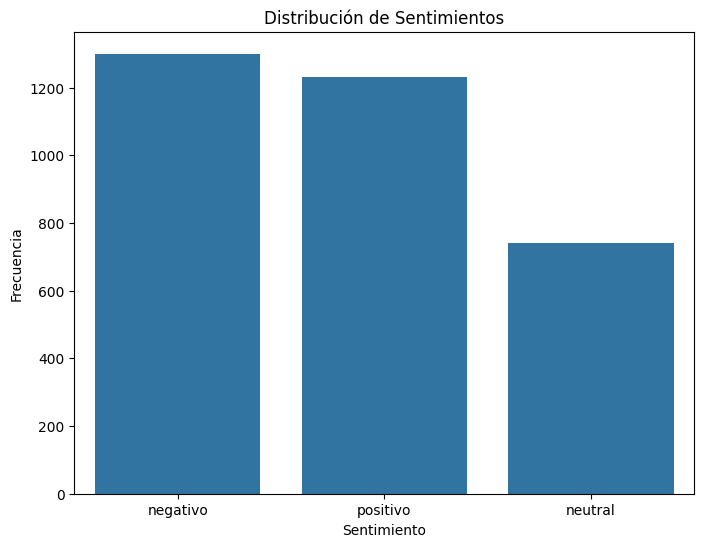

In [345]:

# Distribución de los sentimientos
print(df_unificado['Sentimiento_Final'].value_counts().sort_values)
# Gráfico Distribución de sentimientos del df_unificado ordenado descendente columnas
plt.figure(figsize=(8, 6))
sns.countplot(data=df_unificado, x='Sentimiento_Final', order=df_unificado['Sentimiento_Final'].value_counts().index)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


#### **Exportar**

In [346]:
# Exportar
df_unificado.to_csv('/content/drive/MyDrive/Colab Notebooks/SentimentAPI/dataset_listo_para_ML.csv', index=False)

print("Dataset exportado exitosamente.")

Dataset exportado exitosamente.


---
### <font size=12 color=lightgreen>Observaciones</font>


#### **Origen de los datos**

Con el objetivo de mejorar la capacidad de generalización del modelo, se trabajó con dos datasets independientes obtenidos desde Kaggle.
Si bien ambos conjuntos de datos abordan el análisis de sentimiento en español, presentan diferencias en estructura, calidad lingüística y formato de origen. Su integración permitió ampliar la diversidad de expresiones textuales, reduciendo el sesgo hacia un único estilo de redacción y fortaleciendo la robustez del pipeline de preparación de datos en escenarios similares a producción.

#### **Fuentes de datos (Kaggle):**

https://www.kaggle.com/datasets/engineercolsoquas/spanish-sentiment-analysis-dataset

https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset


---
### **Informe de Desafíos Técnicos y Soluciones**

#### **Dataset** 1 – Inconsistencias en el idioma

- Problema: El dataset original presentaba traducciones incompletas, combinando registros en español con fragmentos en su idioma original, además de traducciones literales de baja calidad. Esta situación afectaba la coherencia semántica del texto y podía introducir ruido en el análisis de sentimiento.

- Solución aplicada: Se utilizó la herramienta de Traducción de Microsoft Excel como apoyo para identificar registros no traducidos. No obstante, la corrección se realizó de forma manual y supervisada, revisando y ajustando cada registro individualmente con el fin de preservar el significado original del texto y evitar distorsiones semánticas. Posteriormente, se realizó una revisión manual (sanity check) para asegurar la consistencia lingüística del dataset completo.

- Impacto en el análisis: La normalización del idioma permitió obtener un corpus coherente en español, reduciendo ambigüedades y mejorando la calidad de los datos de entrada para la etapa de clasificación de sentimiento.


**Dataset 2 – Problemas de codificación de caracteres (encoding)**

- Problema:
El segundo dataset se encontraba en formato Excel y presentaba errores de codificación al ser abierto, evidenciados por la aparición de caracteres especiales incorrectos (mojibake), lo que impedía un procesamiento adecuado del texto.

- Solución aplicada:
Como primer paso, el archivo fue exportado a formato CSV. Posteriormente, se realizó la ingesta mediante Power Query, donde se configuró explícitamente la codificación Unicode (UTF-8), corrigiendo la estructura de caracteres antes de su integración al pipeline de preparación de datos.

- Impacto en el análisis:
La corrección del encoding aseguró la correcta interpretación de caracteres propios del idioma español, evitando pérdidas de información y mejorando la calidad del texto procesado.


---
#### **Definición de Datos**

Dataset exportable:

**Texto_Limpio:** Texto normalizado (minúsculas y sin puntuación), posterior a la corrección de idioma y codificación.

**Sentimiento_Final:** Variable categórica objetivo, codificada como 0 = Negativo, 1 = Neutral, 2 = Positivo.